# Support Vector Machine with titanic

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
##import the dataset
df = pd.read_csv("./titanic/train.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
X = df.iloc[:,2:]
y = df.iloc[:,1]

In [6]:
X.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Simple Preprocessing

In [7]:
X_ = X.iloc[:,[0,2,3,4,5,7,9]]

In [8]:
print('Number of null:', X_.isnull().sum())  

Number of null: Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64


In [9]:
X_['Embarked'].value_counts().sort_values(ascending=False)

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [10]:
X_['Age'] = X_['Age'].fillna(np.mean(X_['Age']))

C:\Users\YOONHOI\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [11]:
X_.loc[:,'Embarked'] = X_['Embarked'].fillna("S")

C:\Users\YOONHOI\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [14]:
print('Number of null:', X_.isnull().sum())

Number of null: Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [15]:
Pclass = pd.get_dummies(X_.Pclass) 
Sex = pd.get_dummies(X_.Sex)
Embarked = pd.get_dummies(X_.Embarked)

# concat 합치는거
X_1 = pd.concat([X_,Pclass],axis=1)
X_1 = pd.concat([X_1,Sex],axis=1)
X_1 = pd.concat([X_1,Embarked],axis=1)
print(X_1.head())


   Pclass     Sex   Age  SibSp  Parch     Fare Embarked  1  2  3  female  \
0       3    male  22.0      1      0   7.2500        S  0  0  1       0   
1       1  female  38.0      1      0  71.2833        C  1  0  0       1   
2       3  female  26.0      0      0   7.9250        S  0  0  1       1   
3       1  female  35.0      1      0  53.1000        S  1  0  0       1   
4       3    male  35.0      0      0   8.0500        S  0  0  1       0   

   male  C  Q  S  
0     1  0  0  1  
1     0  1  0  0  
2     0  0  0  1  
3     0  0  0  1  
4     1  0  0  1  


In [17]:
X_1.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,1,2,3,female,male,C,Q,S
0,3,male,22.0,1,0,7.2500,S,0,0,1,0,1,0,0,1
1,1,female,38.0,1,0,71.2833,C,1,0,0,1,0,1,0,0
2,3,female,26.0,0,0,7.9250,S,0,0,1,1,0,0,0,1
3,1,female,35.0,1,0,53.1000,S,1,0,0,1,0,0,0,1
4,3,male,35.0,0,0,8.0500,S,0,0,1,0,1,0,0,1


In [19]:
X_1.columns[0]

'Pclass'

In [0]:
del X_1['Sex']
del X_1['Embarked']
del X_1['Pclass']

# Split into train, validation, test set

In [0]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# 전체 data set을 (training + validation), test으로 나눔
X_trainval, X_test, y_trainval, y_test = train_test_split(X_1, y, random_state=0)

# (training + validation) set을 training, validation으로 나눔
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)

print("size of training set: %d,  size of validation set: %d,  size of test set: %d" % (
        X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

size of training set: 501,  size of validation set: 167,  size of test set: 223


# Test with validation set

In [0]:
best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # 매개변수 각 조합에 대해 SVC 훈련    
        svm = SVC(gamma=gamma, C=C)
        
        # train set으로 model fitting
        svm.fit(X_train, y_train)
        
        # validation set으로 SVC 평가         
        score = svm.score(X_valid, y_valid) 
        
        # 점수가 더 높으면 기록 
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

print("최고 점수(모델 정확도):", best_score)
print("최적 매개변수:", best_parameters)            

최고 점수(모델 정확도): 0.9940119760479041
최적 매개변수: {'C': 100, 'gamma': 10}


In [0]:
# training set과 validation set을 합쳐 모델을 다시 만든 후 
# test set을 이용하여 모델을 평가 
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)

print("validation set에서 최고 점수: ", best_score)
print("최적 매개변수: ", best_parameters)
print("최적 매개변수에서 test set의 점수(모델 정확도): ", test_score)

validation set에서 최고 점수:  0.9940119760479041
최적 매개변수:  {'C': 100, 'gamma': 10}
최적 매개변수에서 test set의 점수(모델 정확도):  0.6457399103139013


# Test with Cross Validation

In [20]:
param_grid = {'C': [0.1, 1, 10, 100, 200, 300, 500, 1000],
              'gamma': [0.0001, 0.002, 0.003, 0.005, 0.001, 0.01, 0.1, 1]} 
param_grid

{'C': [0.1, 1, 10, 100, 200, 300, 500, 1000],
 'gamma': [0.0001, 0.002, 0.003, 0.005, 0.001, 0.01, 0.1, 1]}

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

grid_search = GridSearchCV(SVC(), param_grid, cv=5)

# overfitting 방지를 위해 training, test set으로 나눔
X_train, X_test, y_train, y_test = train_test_split(X_1, y, random_state=0)
grid_search.fit(X_train, y_train)

print("최적 매개변수 : ",grid_search.best_params_) 
print("최상 교차검증 점수 : ",grid_search.best_score_)
print("최고 성능 모델 : ",grid_search.best_estimator_)

NameError: name 'train_test_split' is not defined

In [0]:
import pandas as pd
from IPython.display import display

In [0]:
results = pd.DataFrame(grid_search.cv_results_)
display(results)

C:\Users\test\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\test\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\test\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\test\Anaconda3\lib\site-packages\sklearn\utils\de

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.008926,0.001272,0.001703,2.430589e-04,0.1,0.0001,"{'C': 0.1, 'gamma': 0.0001}",0.649254,0.664179,0.641791,...,0.652695,0.011981,53,0.657303,0.664794,0.659176,0.657944,0.650467,0.657937,0.004577
1,0.008332,0.000199,0.001593,2.121261e-04,0.1,0.002,"{'C': 0.1, 'gamma': 0.002}",0.619403,0.679104,0.656716,...,0.654192,0.019484,51,0.679775,0.666667,0.664794,0.676636,0.678505,0.673275,0.006269
2,0.008729,0.000597,0.001892,3.651482e-04,0.1,0.003,"{'C': 0.1, 'gamma': 0.003}",0.626866,0.656716,0.626866,...,0.655689,0.025641,50,0.696629,0.653558,0.674157,0.689720,0.693458,0.681504,0.015963
3,0.008134,0.000244,0.001488,2.244095e-05,0.1,0.005,"{'C': 0.1, 'gamma': 0.005}",0.634328,0.641791,0.611940,...,0.639222,0.016325,60,0.717228,0.632959,0.651685,0.685981,0.676636,0.672898,0.028967
4,0.008108,0.000253,0.001714,2.514939e-04,0.1,0.001,"{'C': 0.1, 'gamma': 0.001}",0.626866,0.671642,0.656716,...,0.658683,0.019272,49,0.677903,0.651685,0.664794,0.671028,0.661682,0.665418,0.008835
5,0.008035,0.000200,0.001862,1.878591e-04,0.1,0.01,"{'C': 0.1, 'gamma': 0.01}",0.619403,0.626866,0.611940,...,0.622754,0.009485,62,0.670412,0.625468,0.623596,0.652336,0.637383,0.641839,0.017591
6,0.009631,0.000251,0.001962,1.751986e-05,0.1,0.1,"{'C': 0.1, 'gamma': 0.1}",0.611940,0.611940,0.611940,...,0.613772,0.002252,63,0.614232,0.614232,0.614232,0.613084,0.613084,0.613773,0.000562
7,0.015269,0.000195,0.003274,2.272122e-04,0.1,1,"{'C': 0.1, 'gamma': 1}",0.611940,0.611940,0.611940,...,0.613772,0.002252,63,0.614232,0.614232,0.634831,0.613084,0.613084,0.617893,0.008485
8,0.008035,0.000183,0.001596,4.875595e-04,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.626866,0.671642,0.649254,...,0.654192,0.020989,51,0.676030,0.664794,0.664794,0.667290,0.659813,0.666544,0.005329
9,0.010911,0.001630,0.001885,3.718957e-04,1,0.002,"{'C': 1, 'gamma': 0.002}",0.656716,0.708955,0.679104,...,0.688623,0.019308,45,0.722846,0.717228,0.717228,0.721495,0.712150,0.718190,0.003767


C:\Users\test\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


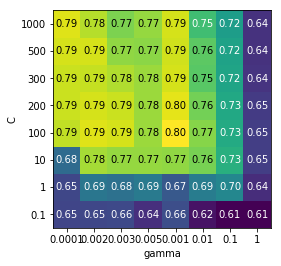

In [0]:
import mglearn
import matplotlib.pyplot as plt

scores = [score.mean_validation_score for score in grid_search.grid_scores_]
scores = np.array(scores).reshape(8, 8)

mglearn.tools.heatmap(scores, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'], yticklabels=param_grid['C'], cmap="viridis")
plt.show()

# Accuracy = 80.3%